## california data (linear regression data)

In [84]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)

## Logistic regrssion 용 데이터

In [0]:
#  해당 코드는 수정하지 마세요
from sklearn.datasets import make_classification



X, y = make_classification(n_features=8, n_informative=5,
                           n_redundant=3, n_clusters_per_class=1, random_state=4, n_samples =1000 )

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

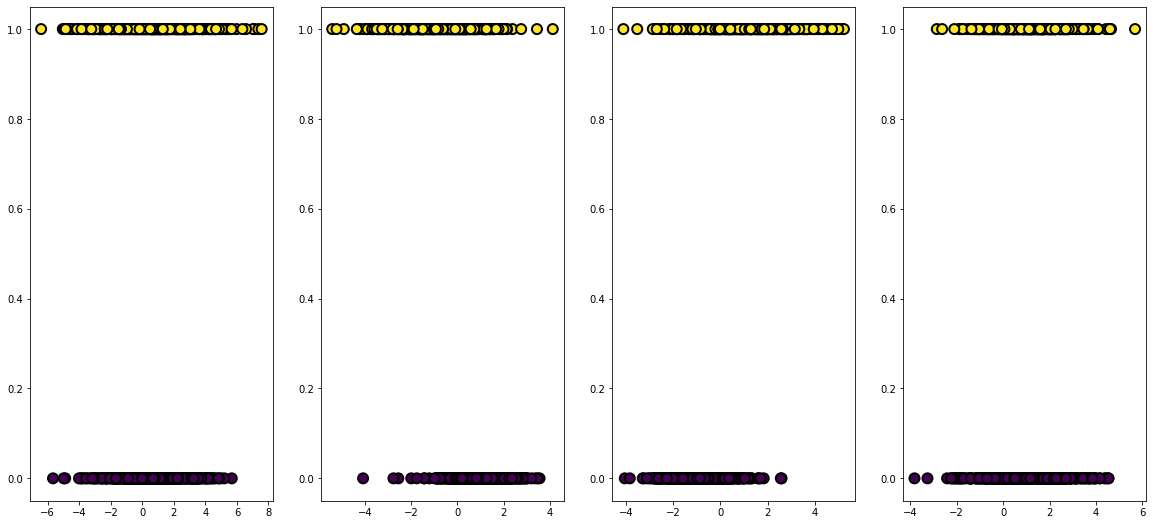

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
plt.scatter(x_train[:,0], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,2)
plt.scatter(x_train[:,1], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,3)
plt.scatter(x_train[:,2], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,4)
plt.scatter(x_train[:,3], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.show()

#1.	Coefficient interpretation (logistic regression)

**A.	주어진 데이터의 모든 feature에 대해서 correlation coefficient array를 구하고 이 중 correlation coefficient 가 높은 5개의 feature를 이용해 feature간의 correlation을 heatmap으로 그린다. **

In [0]:
#  해당 코드는 수정하지 마세요
from sklearn.datasets import make_classification



X, y = make_classification(n_features=8, n_informative=5,
                           n_redundant=3, n_clusters_per_class=1, random_state=4, n_samples =1000 )

In [37]:
import pandas as pd
## correlation coefficient array 구하기
df=pd.DataFrame(X)
corr=df.corr()
corr.columns=["MedInc", "HouseAge", "AveRooms", "AveBedrms" ,"Population", "AveOccup", "Latitude", "Longitude" ]
corr.index=["MedInc", "HouseAge", "AveRooms", "AveBedrms" ,"Population", "AveOccup", "Latitude", "Longitude" ]
corr
#0.7이상이면 강한 양적 상관관계, -0.7이하면 강한 음적 상관관계

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.478951,0.436902,0.864159,0.880861,-0.018816,-0.390682,0.215001
HouseAge,-0.478951,1.000000,-0.575351,-0.304146,-0.527124,-0.566431,-0.354715,-0.367063
AveRooms,0.436902,-0.575351,1.000000,0.403478,0.588714,0.290694,0.572638,0.948551
AveBedrms,0.864159,-0.304146,0.403478,1.000000,0.670715,-0.029360,-0.212808,0.315153
Population,0.880861,-0.527124,0.588714,0.670715,1.000000,-0.229822,-0.183234,0.371171
AveOccup,-0.018816,-0.566431,0.290694,-0.029360,-0.229822,1.000000,0.415417,0.242491
Latitude,-0.390682,-0.354715,0.572638,-0.212808,-0.183234,0.415417,1.000000,0.707985
Longitude,0.215001,-0.367063,0.948551,0.315153,0.371171,0.242491,0.707985,1.000000


In [12]:
import scipy.stats as stats
## coefficient 가 높은 부분의 coefficient와 p값 출력
## 2개의 feature의 공분산
corr4=stats.pearsonr(df[0],df[3])
cov4 = np.cov(df[0], df[3])
print(corr4)
print(cov4)
corr1=stats.pearsonr(df[0],df[4])
cov1 = np.cov(df[0], df[4])
print(corr1)
print(cov1)
corr2=stats.pearsonr(df[2],df[7])
cov2 = np.cov(df[2], df[7])
print(corr2)
print(cov2)
corr3=stats.pearsonr(df[6],df[7])
cov3 = np.cov(df[6], df[7])
print(corr3)
print(cov3)

(0.8641594989388494, 6.579367060057393e-300)
[[5.00356429 2.71002262]
 [2.71002262 1.96552482]]
(0.880860912877387, 0.0)
[[5.00356429 4.65628449]
 [4.65628449 5.58450715]]
(0.948550981769553, 0.0)
[[3.00080706 1.9142054 ]
 [1.9142054  1.35711811]]
(0.7079852050576504, 6.286396493745635e-153)
[[2.61596961 1.3339801 ]
 [1.3339801  1.35711811]]


In [57]:
import numpy as np
import seaborn as sns 
## 높은 coefficient 추출 과정
df=pd.DataFrame(corr)
df=df.drop(['HouseAge', 'AveOccup','AveBedrms'], 1)
df.drop(['HouseAge', 'AveOccup','AveBedrms'], inplace=True)
print(df)

              MedInc  AveRooms  Population  Latitude  Longitude
MedInc      1.000000  0.436902    0.880861 -0.390682   0.215001
AveRooms    0.436902  1.000000    0.588714  0.572638   0.948551
Population  0.880861  0.588714    1.000000 -0.183234   0.371171
Latitude   -0.390682  0.572638   -0.183234  1.000000   0.707985
Longitude   0.215001  0.948551    0.371171  0.707985   1.000000


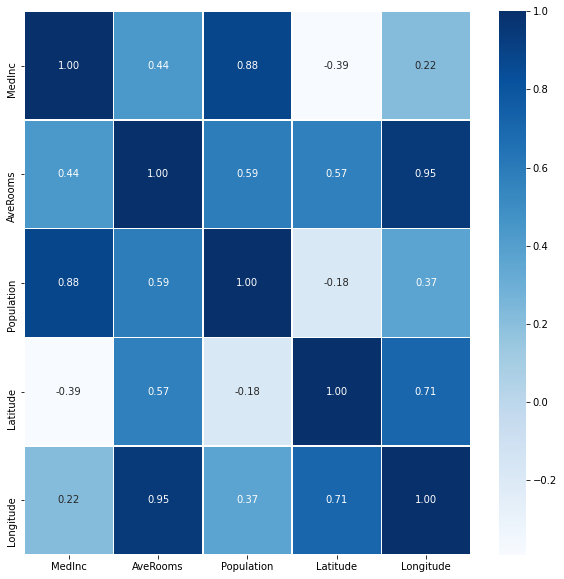

In [58]:
##correlation coefficient가 높은 5개의 feature를 이용한 heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

B.	위에서 구한 correlation coefficient array를 바탕으로 multiple logistic regression 모델에서 사용할 feature를 정하고 90%의 데이터를 학습데이터로 사용하여 regression 모델 학습 후 10% 테스트 데이터에 대한 test acc를 출력한다

In [0]:
#  해당 코드는 수정하지 마세요
from sklearn.datasets import make_classification



X, y = make_classification(n_features=8, n_informative=5,
                           n_redundant=3, n_clusters_per_class=1, random_state=4, n_samples =1000 )

In [60]:
from sklearn.linear_model import LogisticRegression
# 쓸려고 하는 feature값 남기기
df=pd.DataFrame(X)
X=df.drop([1,5,3],1)
X

,0,2,4,6,7
0,2.448869,-0.392408,0.347317,-1.587549,-0.124382
1,-0.697755,-2.468210,-1.265119,-0.938171,-1.090520
2,-0.639334,-1.685357,-0.270319,-1.164062,-1.133899
3,3.004434,1.878130,2.789373,0.318288,1.115634
4,-0.597722,-0.074091,-1.426407,1.706594,0.087431
...,...,...,...,...,...
995,-1.111860,0.707488,-2.198669,1.362627,1.018958
996,0.599167,-1.272645,-0.049581,-0.676135,-0.614608
997,-1.471838,0.342600,-2.402739,2.042493,0.641093
998,3.808383,2.374526,4.112708,0.353089,1.287618


In [0]:
# 90%의 데이터를 학습데이터로 사용하고 10% 테스트 데이터로 사용
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
#y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


## 2.	Variable selection (linear regression)

A. Linear regression 모델의 variable 선택을 통한 모델을 비교하기 위해서 수업시간에 배운 Adjusted R^2을 기반으로 forward selection을 수행한 후 test R^2를 출력하고 x축은 선택한 variable의 개수, y축은 테스트 데이터의 Adjsted R^2과 학습데이터의 Adjusted R^2를 각각 다른 색으로 그래프를 이용해 출력한다.

forward selection 을 이용하여 variable을 4개 까지 선택한다. (for 문 이용)

sklearn의 r2_score 함수에 기반하여 Adjusted R^2를 만든다. 


#  Adjusted R_square을 기반한 forward selection을 수행하기

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd
import itertools
import time
import numpy as np
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression


#california.data, california.target

#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)

In [0]:
from sklearn.metrics import r2_score
# r2_score를 기반으로 Adjusted R_square 구하기

def fit_linear_reg(X,Y,i):
  m=len(Y)
  #linear regression model로 fit하고 RSS와 Adjusted R_square 값 return 하기
  model_k = linear_model.LinearRegression(fit_intercept = True)
  model_k.fit(X,Y)
  RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
  R_squared = r2_score(Y,model_k.predict(X))
  R_squared_adj=1-((1-R_squared)*(m-1)/(m-i-1))
  return RSS, R_squared_adj

In [0]:
## variable 수를 늘리면서 forward selection을 하면서 feature 선택하는 과정
from tqdm import tnrange, tqdm_notebook

#변수 초기화
Y = california.target
X = california.data
#8개의 feature 설정
k = 8
X=pd.DataFrame(X)
X.columns=["MedInc", "HouseAge", "AveRooms", "AveBedrms" ,"Population", "AveOccup", "Latitude", "Longitude" ]


remaining_features = list(X.columns.values)
features = []
R_squared_adj_list, RSS_list = [np.inf], [np.inf] #loop의 1 indexing을 위해서
features_list = dict()

for i in range(1,k+1):
    best_R_squared_adj = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            R_squared_adj = fit_linear_reg(X[list(combo) + features],Y,i)   #temp 값 저장하기

            if R_squared_adj[0] < best_R_squared_adj: # 비교 후 최고 값 걸러내기
                best_R_squared_adj = R_squared_adj[0]
                best_RSS = R_squared_adj[1] 
                best_feature = combo[0]

    #다음 loop에 variable 저장
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #plotting을 위해서 값 저장
    R_squared_adj_list.append(best_R_squared_adj)
    RSS_list.append(best_RSS)
    features_list[i] = features.copy()

In [68]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |')
display([(i,features_list[i]) for i in range(1,5)])

Forward stepwise subset selection
Number of features | Features |


[(1, ['MedInc']),
 (2, ['MedInc', 'HouseAge']),
 (3, ['MedInc', 'HouseAge', 'Latitude']),
 (4, ['MedInc', 'HouseAge', 'Latitude', 'Longitude'])]

# test R^2 구하기

In [73]:
# 4개의 variable로 추리기
california.data=pd.DataFrame(california.data)
california.data=california.data.drop([2,3,4,5],1)
california.data

KeyError: ignored

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)

In [76]:
# test R_square score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
lm.fit(x_train, y_train)


R_square = r2_score(y_test,lm.predict(x_test))
score= lm.score(x_test,y_test)
print ("Linear Regression test file accuracy: "+str(R_square))
print("Linear Regression test R^2: "+ str(score))

Linear Regression test file accuracy: 0.5581245255368082
Linear Regression test R^2: 0.5581245255368082


# x축은 선택한 variable의 개수, y축은 테스트 데이터의 Adjusted R^2와 학습데이터 Adjusted R^2 그래프

variable 수가 1개 일때

In [0]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

In [79]:
california.data=pd.DataFrame(california.data)
california.data=california.data.drop([1,6,7,2,3,4,5],1)
california.data

,0
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)

In [0]:
def fit_linear_reg(X,Y,i):
  m=len(Y)
  #linear regression model로 fit하고 RSS와 Adjusted R_square 값 return 하기
  model_k = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
  model_k.fit(X,Y)
 
  R_squared = r2_score(Y,model_k.predict(X))
  R_squared_adj=1-((1-R_squared)*(m-1)/(m-i-1))
  return R_squared_adj

In [82]:
trainer1= fit_linear_reg(x_train,y_train,1)
tester1= fit_linear_reg(x_test,y_test,1)
print(trainer1, tester1)

0.4738554277463244 0.4697504700515067


variable 수가 2개 일 때

In [0]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

In [85]:
california.data=pd.DataFrame(california.data)
california.data=california.data.drop([6,7,2,3,4,5],1)
california.data

,0,1
0,8.3252,41.0
1,8.3014,21.0
2,7.2574,52.0
3,5.6431,52.0
4,3.8462,52.0
...,...,...
20635,1.5603,25.0
20636,2.5568,18.0
20637,1.7000,17.0
20638,1.8672,18.0


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)

In [0]:
def fit_linear_reg(X,Y,i):
  m=len(Y)
  #linear regression model로 fit하고 RSS와 Adjusted R_square 값 return 하기
  model_k = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
  model_k.fit(X,Y)
 
  R_squared = r2_score(Y,model_k.predict(X))
  R_squared_adj=1-((1-R_squared)*(m-1)/(m-i-1))
  return R_squared_adj

In [88]:
trainer2= fit_linear_reg(x_train,y_train,2)
tester2= fit_linear_reg(x_test,y_test,2)
print(trainer2, tester2)

0.5098317850078955 0.5014926007851014


variable이 3개 일 때

In [89]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [90]:
california.data=pd.DataFrame(california.data)
california.data=california.data.drop([7,2,3,4,5],1)
california.data

,0,1,6
0,8.3252,41.0,37.88
1,8.3014,21.0,37.86
2,7.2574,52.0,37.85
3,5.6431,52.0,37.85
4,3.8462,52.0,37.85
...,...,...,...
20635,1.5603,25.0,39.48
20636,2.5568,18.0,39.49
20637,1.7000,17.0,39.43
20638,1.8672,18.0,39.43


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)

In [92]:
trainer3= fit_linear_reg(x_train,y_train,3)
tester3= fit_linear_reg(x_test,y_test,3)
print(trainer3, tester3)

0.5155047470108205 0.5308690714945279


variable이 4일 때

In [93]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [94]:
california.data=pd.DataFrame(california.data)
california.data=california.data.drop([2,3,4,5],1)
california.data

,0,1,6,7
0,8.3252,41.0,37.88,-122.23
1,8.3014,21.0,37.86,-122.22
2,7.2574,52.0,37.85,-122.24
3,5.6431,52.0,37.85,-122.25
4,3.8462,52.0,37.85,-122.25
...,...,...,...,...
20635,1.5603,25.0,39.48,-121.09
20636,2.5568,18.0,39.49,-121.21
20637,1.7000,17.0,39.43,-121.22
20638,1.8672,18.0,39.43,-121.32


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)

In [96]:
trainer4= fit_linear_reg(x_train,y_train,4)
tester4= fit_linear_reg(x_test,y_test,4)
print(trainer4, tester4)

0.595558531853935 0.5801150721465737


In [101]:
from pandas import Series, DataFrame
# variable의 개수, 테스트 데이터, 학습데이터 Adjusted R_square Dataframe
data={'trainer': [0, trainer1, trainer2, trainer3, trainer4],
      'tester': [0, tester1, tester2, tester3, tester4]
      }

data=DataFrame(data)
data

,trainer,tester
0,0.000000,0.000000
1,0.473855,0.469750
2,0.509832,0.501493
3,0.515505,0.530869
4,0.595559,0.580115


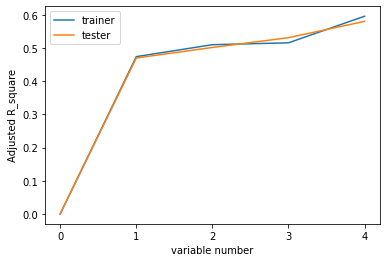

In [102]:
# x축 variable 개수, y축 Adiusted R_square 
import matplotlib.pyplot as plt


ax3=data.plot()
ax3.set_xticks(data.index)
plt.xlabel("variable number")
plt.ylabel("Adjusted R_square")
plt.show()

# 3. Regularized linear model

In [107]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [0]:
from sklearn.model_selection import train_test_split

# 학습데이터는 90%를 차지하고 테스트데이터는 10%차지 

x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)

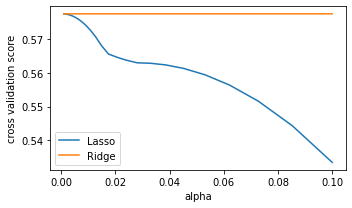

In [105]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Ridge와 Lasso는 hyper parameter가 늘수록 cross validation score의 상관관계를 보여준다.
alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), x_train, y_train, cv=5).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

Lasso의 optimal parameter 선택하기

In [109]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

estimator = Lasso()
#넣을 parameter 설정
param_grid = {'alpha':[0,0.001,0.01,0.03,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]}
# 5-Fold CV 설정
cv=KFold(n_splits=5, random_state=1)
#넣을 parameter와 5-Fold CV를 이용해서 최고 parameter 찾기
grid = GridSearchCV(estimator, param_grid=param_grid, cv=cv, scoring='r2') #디폴트로 cv=3, 회귀에서 디폴트로 scoring='r2'
grid.fit(x_train, y_train)
# 각 파라미터 때의 값 Dataframe으로 만들기
print(pd.DataFrame(grid.cv_results_).sort_values(by='param_alpha'))
print(grid.best_score_)
print(grid.best_params_)
estimator = grid.best_estimator_
score=grid.score(x_test,y_test)
#교차 검증 점수
print(np.mean(model_selection.cross_val_score(estimator, x_test, y_test, scoring='r2')))

# test R_square 출력
print('test R_square score: '+ str(score))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3811.747960396773, tolerance: 1.9608074754299618
  positive)
/u

    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.178016      0.005301  ...        0.018181                2
1        0.019779      0.001976  ...        0.018186                1
2        0.014693      0.001811  ...        0.018890                3
3        0.010107      0.001430  ...        0.019699                4
4        0.008471      0.000170  ...        0.019935                5
5        0.007442      0.000026  ...        0.020874                6
6        0.005132      0.003882  ...        0.020432                7
7        0.003775      0.001386  ...        0.018663                8
8        0.002937      0.000032  ...        0.017419                9
9        0.002868      0.000056  ...        0.016157               10
10       0.002889      0.000063  ...        0.014779               11
11       0.002821      0.000021  ...        0.013279               12
12       0.002954      0.000046  ...        0.011696               13
13       0.002793   